In [73]:
%matplotlib notebook

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Employment Predictions 

In [41]:
# Get file path 
# file_path = "..Immigration\Employment Projections.csv"
file_paths = "C:\\Users\\linet\\OneDrive\\Desktop\\Immigration\\Immigration\\Employment Projections.csv"
# Load CSV data into a DataFrame
employment_projections = pd.read_csv(file_paths)
print(employment_projections.shape)
employment_projections.head()

(832, 14)


,Occupation Title,Occupation Code,Employment 2022,Employment 2032,"Employment Change, 2022-2032","Employment Percent Change, 2022-2032","Occupational Openings, 2022-2032 Annual Average",Median Annual Wage 2023,Typical Entry-Level Education,Education Code,Work Experience in a Related Occupation,Workex Code,Typical on-the-job Training,trCode
0,Accountants and auditors * Account Auditor*...,"=""13-2011""","1,538.4","1,605.8",67.4,4.4,126.5,"79,880",Bachelor's degree,3,NaN,4,NaN,6
1,Actors * Actor Understudy* Actress* Dramati...,"=""27-2011""",78.1,80.6,2.5,3.2,9.3,NaN,"Some college, no degree",6,NaN,4,Long-term on-the-job training,3
2,Actuaries * Actuarial Associate* Actuarial ...,"=""15-2011""",30.0,36.9,7.0,23.2,2.3,"120,000",Bachelor's degree,3,NaN,4,Long-term on-the-job training,3
3,Acupuncturists * Acupuncture Physician* Lic...,"=""29-1291""",26.6,28.0,1.4,5.3,1.8,"78,220",Master's degree,2,NaN,4,NaN,6
4,Adhesive bonding machine operators and tenders...,"=""51-9191""",11.4,11.2,-0.3,-2.2,1.0,"43,540",High school diploma or equivalent,7,NaN,4,Moderate-term on-the-job training,4


In [42]:
# Get an overview of the DataFrame structure
print(employment_projections.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Occupation Title                                 832 non-null    object 
 1   Occupation Code                                  832 non-null    object 
 2   Employment 2022                                  832 non-null    object 
 3   Employment 2032                                  832 non-null    object 
 4   Employment Change, 2022-2032                     832 non-null    float64
 5   Employment Percent Change, 2022-2032             832 non-null    float64
 6   Occupational Openings, 2022-2032 Annual Average  832 non-null    float64
 7   Median Annual Wage 2023                          826 non-null    object 
 8   Typical Entry-Level Education                    832 non-null    object 
 9   Education Code                  

In [43]:
# Check current columns
print("Current columns:")
print(employment_projections.columns)

Current columns:
Index(['Occupation Title', 'Occupation Code', 'Employment 2022',
       'Employment 2032', 'Employment Change, 2022-2032',
       'Employment Percent Change, 2022-2032',
       'Occupational Openings, 2022-2032 Annual Average',
       'Median Annual Wage 2023', 'Typical Entry-Level Education',
       'Education Code', 'Work Experience in a Related Occupation',
       'Workex Code', 'Typical on-the-job Training', 'trCode'],
      dtype='object')


In [44]:
# Define columns to drop
columns_to_drop = ['Occupation Code', 'Work Experience in a Related Occupation', 'Education Code', 'Workex Code', 'Median Annual Wage 2023' , 'trCode']

# Drop columns inplace
employment_projections.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Print remaining column names
print("\nRemaining columns after dropping:")
print(employment_projections.columns)


Remaining columns after dropping:
Index(['Occupation Title', 'Employment 2022', 'Employment 2032',
       'Employment Change, 2022-2032', 'Employment Percent Change, 2022-2032',
       'Occupational Openings, 2022-2032 Annual Average',
       'Typical Entry-Level Education', 'Typical on-the-job Training'],
      dtype='object')


In [45]:
# Get an overview of the DataFrame structure
print(employment_projections.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Occupation Title                                 832 non-null    object 
 1   Employment 2022                                  832 non-null    object 
 2   Employment 2032                                  832 non-null    object 
 3   Employment Change, 2022-2032                     832 non-null    float64
 4   Employment Percent Change, 2022-2032             832 non-null    float64
 5   Occupational Openings, 2022-2032 Annual Average  832 non-null    float64
 6   Typical Entry-Level Education                    832 non-null    object 
 7   Typical on-the-job Training                      509 non-null    object 
dtypes: float64(3), object(5)
memory usage: 52.1+ KB
None


In [46]:
# Dispaly dataFrame to use 
print(employment_projections.shape)
employment_projections.head()

(832, 8)


,Occupation Title,Employment 2022,Employment 2032,"Employment Change, 2022-2032","Employment Percent Change, 2022-2032","Occupational Openings, 2022-2032 Annual Average",Typical Entry-Level Education,Typical on-the-job Training
0,Accountants and auditors * Account Auditor*...,"1,538.4","1,605.8",67.4,4.4,126.5,Bachelor's degree,NaN
1,Actors * Actor Understudy* Actress* Dramati...,78.1,80.6,2.5,3.2,9.3,"Some college, no degree",Long-term on-the-job training
2,Actuaries * Actuarial Associate* Actuarial ...,30.0,36.9,7.0,23.2,2.3,Bachelor's degree,Long-term on-the-job training
3,Acupuncturists * Acupuncture Physician* Lic...,26.6,28.0,1.4,5.3,1.8,Master's degree,NaN
4,Adhesive bonding machine operators and tenders...,11.4,11.2,-0.3,-2.2,1.0,High school diploma or equivalent,Moderate-term on-the-job training


In [47]:
# Replace NaN values in 'Employment 2022' and 'Employment 2032' with 0
employment_projections['Employment 2022'].fillna(0, inplace=True)
employment_projections['Employment 2032'].fillna(0, inplace=True)

# Print a sample of the updated DataFrame to verify
employment_projections.head()

,Occupation Title,Employment 2022,Employment 2032,"Employment Change, 2022-2032","Employment Percent Change, 2022-2032","Occupational Openings, 2022-2032 Annual Average",Typical Entry-Level Education,Typical on-the-job Training
0,Accountants and auditors * Account Auditor*...,"1,538.4","1,605.8",67.4,4.4,126.5,Bachelor's degree,NaN
1,Actors * Actor Understudy* Actress* Dramati...,78.1,80.6,2.5,3.2,9.3,"Some college, no degree",Long-term on-the-job training
2,Actuaries * Actuarial Associate* Actuarial ...,30.0,36.9,7.0,23.2,2.3,Bachelor's degree,Long-term on-the-job training
3,Acupuncturists * Acupuncture Physician* Lic...,26.6,28.0,1.4,5.3,1.8,Master's degree,NaN
4,Adhesive bonding machine operators and tenders...,11.4,11.2,-0.3,-2.2,1.0,High school diploma or equivalent,Moderate-term on-the-job training


In [48]:
# Summary statistics
summary_stats = employment_projections[['Employment 2022', 'Employment 2032', 'Employment Change, 2022-2032', 
                                        'Employment Percent Change, 2022-2032', 
                                        'Occupational Openings, 2022-2032 Annual Average']].describe()
summary_stats

,"Employment Change, 2022-2032","Employment Percent Change, 2022-2032","Occupational Openings, 2022-2032 Annual Average"
count,832.000000,832.000000,832.000000
mean,5.608413,1.948317,22.315385
std,43.231599,8.449846,63.639492
min,-348.100000,-38.600000,0.000000
25%,-0.100000,-0.850000,1.500000
50%,0.700000,2.900000,4.600000
75%,5.225000,5.300000,15.350000
max,804.600000,44.900000,789.300000


In [39]:
# Count of unique values
unique_edu_levels = employment_projections['Typical Entry-Level Education'].value_counts()
unique_training = employment_projections['Typical on-the-job Training'].value_counts()
print("Unique Entry-Level Education Levels:\n", unique_edu_levels)
print("\nUnique On-the-Job Training Types:\n", unique_training)

Unique Entry-Level Education Levels:
 Typical Entry-Level Education
High school diploma or equivalent    327
Bachelor's degree                    179
No formal educational credential     108
Doctoral or professional degree       73
Postsecondary nondegree award         50
Associate's degree                    49
Master's degree                       39
Some college, no degree                7
Name: count, dtype: int64

Unique On-the-Job Training Types:
 Typical on-the-job Training
Moderate-term on-the-job training    229
Short-term on-the-job training       174
Long-term on-the-job training         56
Internship/residency                  35
Apprenticeship                        15
Name: count, dtype: int64


In [52]:
# Convert 'Employment 2022' to numeric type, handling errors gracefully
employment_projections['Employment 2022'] = pd.to_numeric(employment_projections['Employment 2022'], errors='coerce')

# Drop rows where 'Employment 2022' is NaN, if any (optional step)
employment_projections.dropna(subset=['Employment 2022'], inplace=True)

<IPython.core.display.Javascript object>


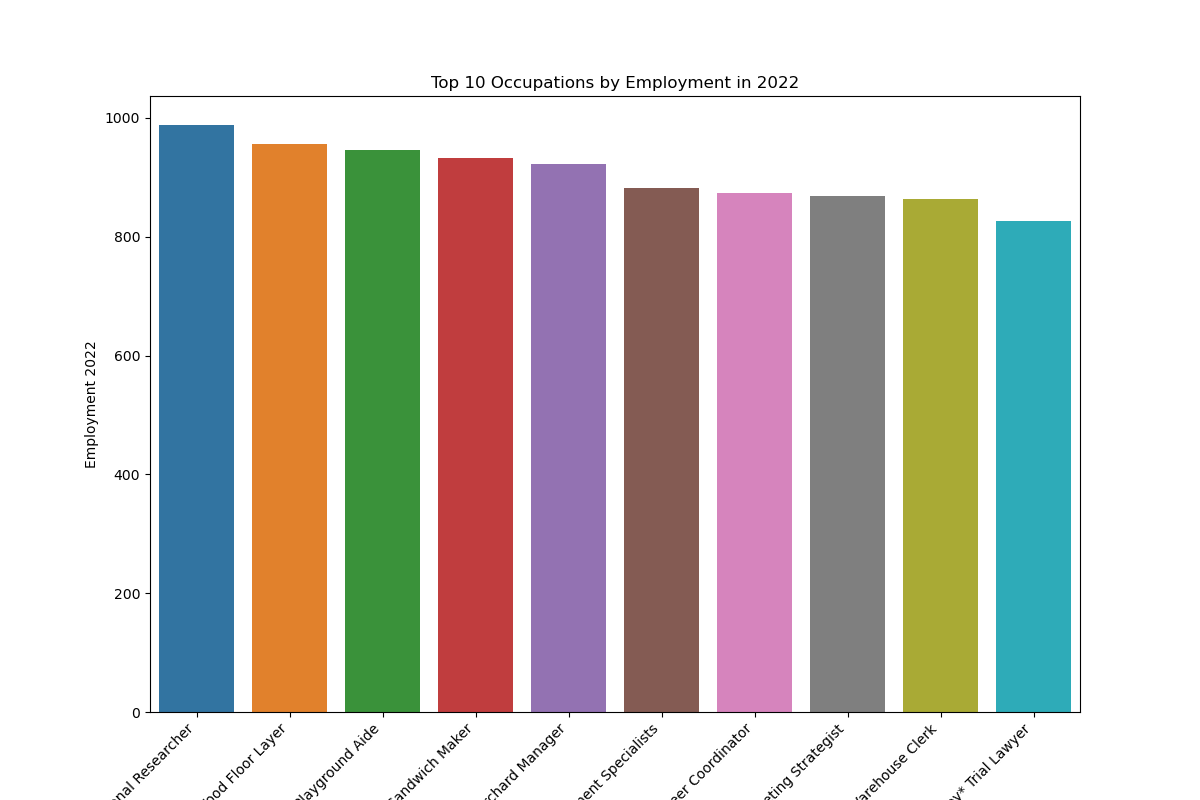

In [56]:
# Create the vertically oriented bar plot of top 10 occupations by Employment in 2022
plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation Title', y='Employment 2022', 
            data=employment_projections.sort_values(by='Employment 2022', ascending=False).head(10))
plt.title('Top 10 Occupations by Employment in 2022')
plt.xlabel('Occupation Title')
plt.ylabel('Employment 2022')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
# plt.savefig('top_10_occupations_2022.png')

# Display the plot
plt.show()

In [60]:
# Convert 'Employment 2032' to numeric type, handling errors gracefully
employment_projections['Employment 2032'] = pd.to_numeric(employment_projections['Employment 2032'], errors='coerce')

# Optional: Drop rows where 'Employment 2032' is NaN
employment_projections.dropna(subset=['Employment 2032'], inplace=True)

<IPython.core.display.Javascript object>


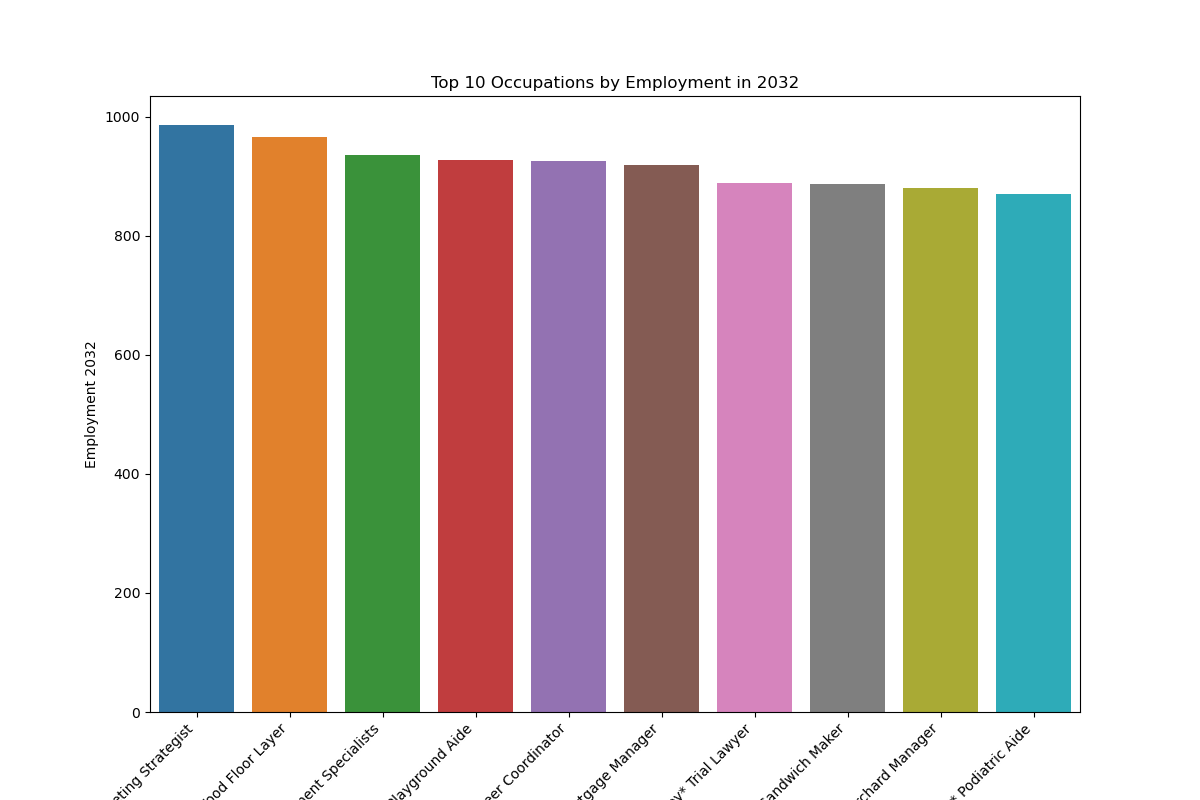

In [63]:
# Create the vertically oriented bar plot of top 10 occupations by Employment in 2032
plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation Title', y='Employment 2032', 
            data=employment_projections.sort_values(by='Employment 2032', ascending=False).head(10))
plt.title('Top 10 Occupations by Employment in 2032')
plt.xlabel('Occupation Title')
plt.ylabel('Employment 2032')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
# plt.savefig('top_10_occupations_2032_vertical.png')

# Display the plot
plt.show()

<IPython.core.display.Javascript object>


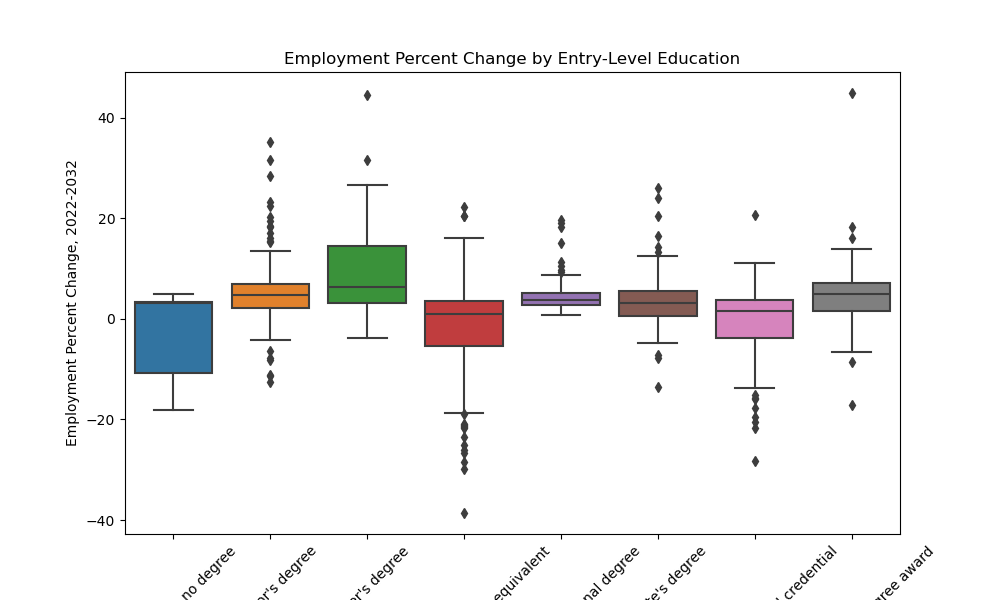

In [64]:
# Box plot of Employment Percent Change by Entry-Level Education
plt.figure(figsize=(10, 6))
sns.boxplot(x='Typical Entry-Level Education', y='Employment Percent Change, 2022-2032', data=employment_projections)
plt.title('Employment Percent Change by Entry-Level Education')
plt.xlabel('Typical Entry-Level Education')
plt.ylabel('Employment Percent Change, 2022-2032')
plt.xticks(rotation=45)
plt.show()


<IPython.core.display.Javascript object>


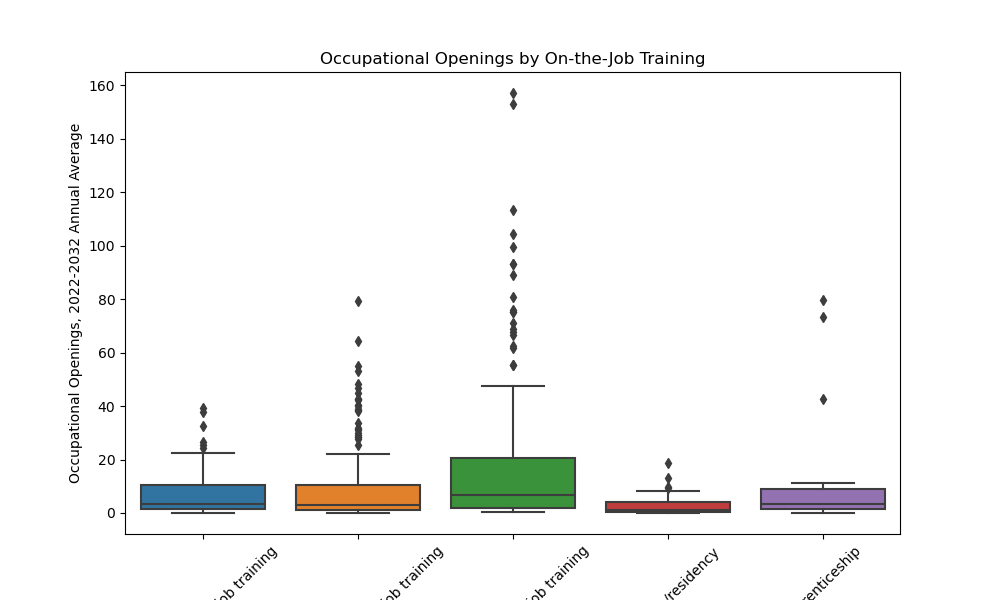

In [65]:
# Box plot of Occupational Openings by On-the-Job Training
plt.figure(figsize=(10, 6))
sns.boxplot(x='Typical on-the-job Training', y='Occupational Openings, 2022-2032 Annual Average', data=employment_projections)
plt.title('Occupational Openings by On-the-Job Training')
plt.xlabel('Typical on-the-job Training')
plt.ylabel('Occupational Openings, 2022-2032 Annual Average')
plt.xticks(rotation=45)
plt.show()

 # Immigration 

In [66]:
# Get file path 
# file_path = "..Immigration\immigration statistics.csv"
file_path = "C:\\Users\\linet\\OneDrive\\Desktop\\Immigration\\Immigration\\immigration statistics.csv"
# Load CSV data into a DataFrame
immigration = pd.read_csv(file_path)
print(immigration.shape)
immigration.head()

(42, 6)


,Year,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
0,1980,"524,295","207,116","910,361","18,013","719,211"
1,1981,"595,014","159,252","975,780","17,379","823,875"
2,1982,"533,624","98,096","970,246","15,216","812,572"
3,1983,"550,052","61,218","1,251,357","19,211","931,600"
4,1984,"541,811","70,393","1,246,981","18,696","909,833"


In [78]:
# Print basic information about the DataFrame
print(immigration.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Year                                                   42 non-null     int64 
 1   Immigrants Obtaining Lawful Permanent Resident Status  42 non-null     object
 2   Refugee Arrivals                                       42 non-null     object
 3   Noncitizen Apprehensions                               42 non-null     object
 4   Noncitizen Removals                                    42 non-null     object
 5   Noncitizen Returns                                     42 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.1+ KB
None


In [80]:
# Perform some basic statistics
print(immigration.describe())

              Year
count    42.000000
mean   2000.500000
std      12.267844
min    1980.000000
25%    1990.250000
50%    2000.500000
75%    2010.750000
max    2021.000000


<IPython.core.display.Javascript object>


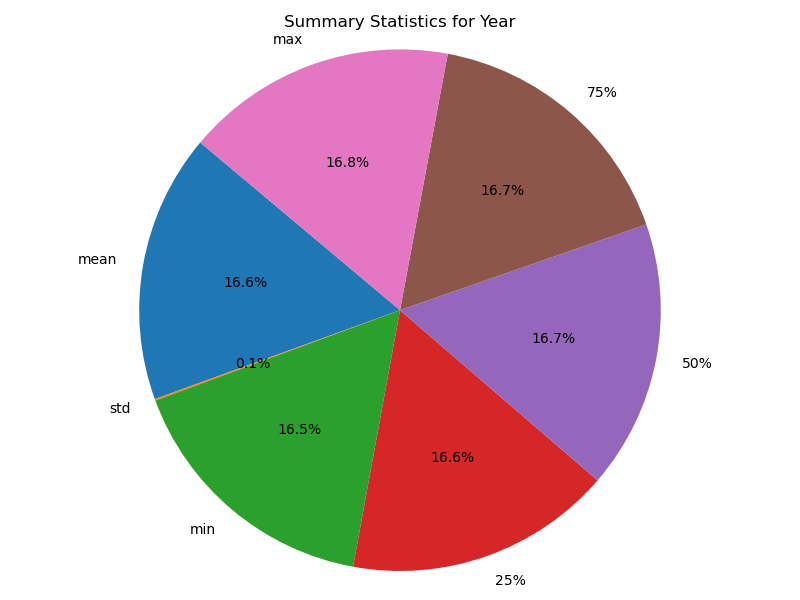

In [97]:
# Convert summary statistics to a DataFrame
summary_stats = {
    'count': 42,
    'mean': 2000,
    'std': 12.267844,
    'min': 1980,
    '25%': 1990.25,
    '50%': 2000.5,
    '75%': 2010.75,
    'max': 2021
}

# Extracting years and values from summary_stats
years = list(summary_stats.keys())
values = list(summary_stats.values())

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(values[1:], labels=years[1:], autopct='%1.1f%%', startangle=140)
plt.title('Summary Statistics for Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
# plt.savefig('summary_statistics_pie_chart.png')

plt.show()

In [100]:
# Group by 'Year' and sum 'Refugee Arrivals'
yearly_refugee_arrivals = immigration.groupby('Year')['Refugee Arrivals'].sum()
yearly_refugee_arrivals

Year
1980     207,116 
1981     159,252 
1982      98,096 
1983      61,218 
1984      70,393 
1985      67,704 
1986      62,146 
1987      64,528 
1988      76,483 
1989     107,070 
1990     122,066 
1991     113,389 
1992     115,548 
1993     114,181 
1994     111,680 
1995      98,973 
1996      75,421 
1997      69,653 
1998      76,712 
1999      85,285 
2000       72,165
2001       68,920
2002       26,785
2003       28,286
2004       52,840
2005       53,738
2006       41,094
2007       48,218
2008       60,107
2009       74,602
2010       73,293
2011       56,384
2012       58,179
2013       69,909
2014       69,975
2015       69,920
2016       84,989
2017       53,691
2018       22,405
2019       29,916
2020       11,840
2021       11,454
Name: Refugee Arrivals, dtype: object

In [111]:
# Find the year with the maximum refugee arrivals
year_with_most_arrivals = yearly_refugee_arrivals.idxmax()
year_with_most_arrivals

1982

In [112]:
year_with_least_arrivals = yearly_refugee_arrivals.idxmin()
year_with_least_arrivals

1994

# Foreign-Born Employement 

In [72]:
# Get file path 
# file_path3 = "..Immigration\foreign-born employment.csv"
file_path3 = "C:\\Users\\linet\\OneDrive\\Desktop\\Immigration\\Immigration\\foreign-born employment.csv"
# Load the CSV file into Dataframe 
try:
    foreign = pd.read_csv(file_path3, header=1)  
    print(foreign)  # Print the first few rows of the DataFrame
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

               Total, % of foreign-born population, 2022
Category                         Foreign-born employment
Iceland                                             82.9
New Zealand                                         82.7
Czechia                                               81
Hungary                                             80.6
Slovak Rep.                                         78.3
Israel                                              77.9
Portugal                                            77.8
Australia                                           77.2
Ireland                                               77
United Kingdom                                      75.8
Chile                                               75.5
Switzerland                                         75.3
Canada                                              75.2
Poland                                              75.1
Estonia                                             74.7
Luxembourg                     

# Poverty Gap 

In [70]:
# Get file path 
# file_path1 = "..Immigration\poverty gap.csv"
file_path1 = "C:\\Users\\linet\\OneDrive\\Desktop\\Immigration\\Immigration\\poverty gap.csv"
# Load the CSV file into a DataFrame
try:
    poverty = pd.read_csv(file_path1, header=1)  
    print(poverty)  # Print the first few rows of the DataFrame
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

               Total, % points, 2021
Category                       Total
Hungary                         37.9
Japan                           36.7
Costa Rica                      36.5
United Kingdom                  35.6
Norway                          35.6
Italy                           34.7
United States                   34.1
Spain                           33.1
Austria                           33
Greece                          32.7
Israel                          32.6
Latvia                          32.4
Korea                           31.9
Luxembourg                      31.3
Netherlands                     30.8
Lithuania                       29.4
France                          29.3
Canada                          27.6
Estonia                         27.1
Poland                          26.9
Portugal                        26.8
Türkiye                         26.3
Slovak Rep.                     25.3
Sweden                          22.2
Belgium                         22.1
S

# Income Inequality 

In [71]:
# Get file path 
# file_path2 = "..Immigration\income inequality.csv"
file_path2 = "C:\\Users\\linet\\OneDrive\\Desktop\\Immigration\\Immigration\\income inequality.csv"
# Load the CSV file into Dataframe
try:
    income = pd.read_csv(file_path2, header=1)  
    print(income)  # Print the first few rows of the DataFrame
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

               Gini coefficient: 0 = complete equality; 1 = complete inequality, 2021
Category        Gini coefficient: 0 = complete equality; 1 = c...                    
Costa Rica                                                  0.487                    
Türkiye                                                     0.433                    
United States                                               0.375                    
Lithuania                                                   0.366                    
United Kingdom                                              0.354                    
Israel                                                      0.348                    
Latvia                                                      0.343                    
Japan                                                       0.338                    
Italy                                                        0.33                    
Korea                                                 